In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv(r"housing.csv",)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


<Axes: xlabel='longitude', ylabel='latitude'>

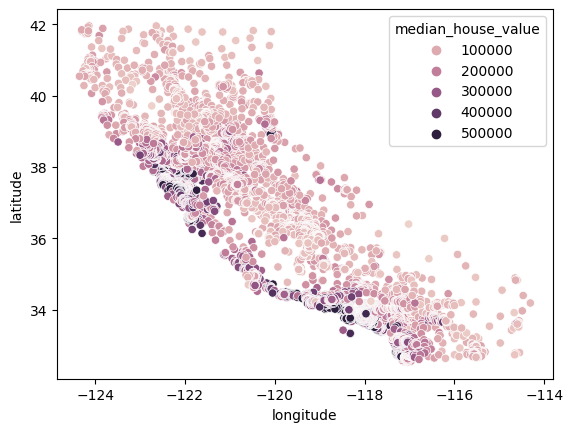

In [3]:
sns.scatterplot(data[["longitude","latitude","median_house_value"]],x='longitude',y='latitude',hue='median_house_value')

In [4]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [5]:
x=data[['longitude','latitude']]
y=data[['median_house_value']]


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_normalize=preprocessing.normalize(X_train)
x_normalize

array([[-0.9630887 ,  0.26918424],
       [-0.96150245,  0.27479636],
       [-0.96102269,  0.27646951],
       ...,
       [-0.96107847,  0.27627555],
       [-0.95566033,  0.29447126],
       [-0.95555427,  0.29481526]])

In [8]:
y_normalize=preprocessing.normalize(Y_train)
y_normalize

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [9]:
from sklearn import metrics
sil=[]
for i in range(2,30):   
    kmn = KMeans(n_clusters=i,random_state=2, n_init="auto")
    reg=kmn.fit(x_normalize) # type: ignore
    sil.append(metrics.silhouette_score(X_train,kmn.labels_))
sil

[0.7445269161902501,
 0.5991694379422454,
 0.510008270643546,
 0.39168762163706167,
 0.37739384152584615,
 0.35321090576195646,
 0.3457438077558067,
 0.16426614958277194,
 0.12575734807133537,
 0.12052484719531954,
 0.11888156478013191,
 0.13025731968193185,
 0.08656044600948863,
 0.08245987313761939,
 0.06641775592977084,
 0.04205260788555444,
 0.01952672385226735,
 0.015531356318735824,
 0.03154397949002773,
 0.029819734970794026,
 0.01464841289242801,
 0.017989467810634607,
 0.01660929888687079,
 0.005480001332503434,
 -0.001296871393118615,
 -0.004762163264566397,
 -0.02064659596108103,
 -0.02036821370375735]

<Axes: >

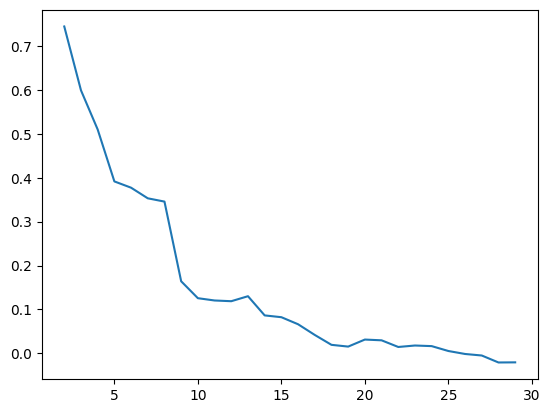

In [11]:
sns.lineplot(x=range(2,30),y=sil)


<Axes: xlabel='longitude', ylabel='latitude'>

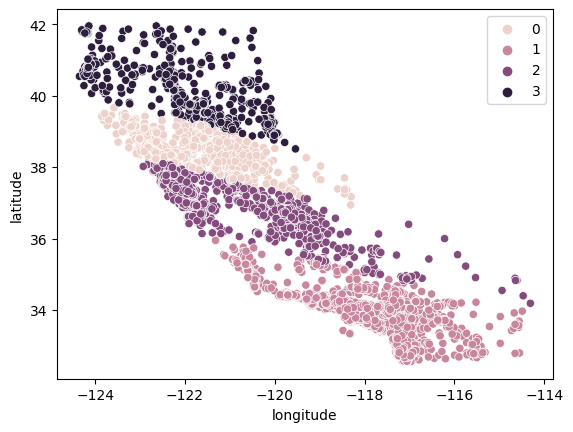

In [ ]:
sns.scatterplot(data=X_train,x='longitude',y='latitude',hue=kmn.labels_)

0.510008270643546